In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib .pyplot as plt
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
blackF = pd.read_csv('BlackFriday.csv')

In [3]:
blackF.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
blackF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
blackF.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
blackF['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

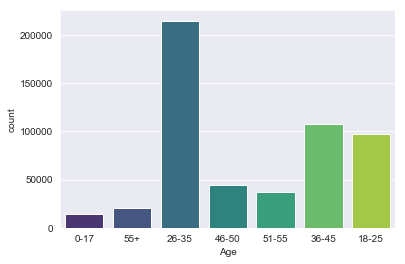

In [7]:
sns.countplot(x= 'Age',data=blackF,palette='viridis')

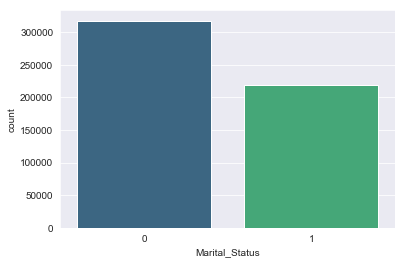

In [8]:
sns.countplot(x= 'Marital_Status',data=blackF,palette='viridis')

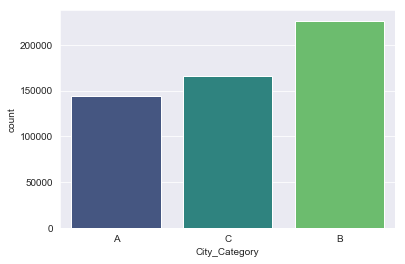

In [9]:
sns.countplot(x='City_Category' ,data=blackF,palette='viridis')

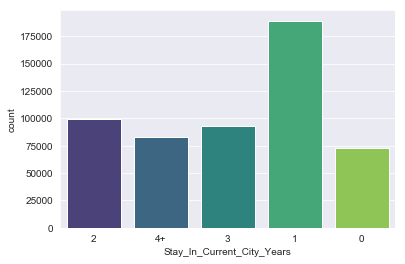

In [10]:
sns.countplot(x='Stay_In_Current_City_Years',data=blackF,palette='viridis')

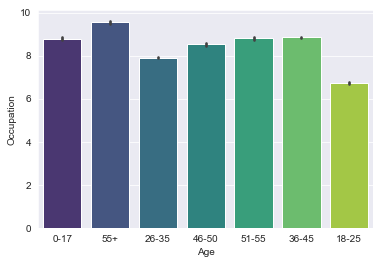

In [11]:
sns.barplot(x='Age',y='Occupation',data=blackF,palette='viridis')

In [12]:
ageOcup = blackF.groupby(by=['Age','Occupation']).count()['Purchase'].unstack()

In [13]:
ageOcup.fillna(value=0,inplace=True)

In [14]:
ageOcup.head()

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,,
0-17,2044.0,386.0,134.0,0.0,110.0,0.0,0.0,131.0,29.0,0.0,...,16.0,236.0,14.0,91.0,0.0,0.0,34.0,0.0,797.0,0.0
18-25,8888.0,3751.0,4228.0,1846.0,47337.0,1398.0,1138.0,2021.0,14.0,548.0,...,709.0,4438.0,0.0,4325.0,887.0,1753.0,3830.0,1075.0,2456.0,5367.0
26-35,33575.0,18443.0,12324.0,8020.0,21353.0,5978.0,7042.0,23464.0,363.0,1435.0,...,4885.0,14943.0,0.0,13216.0,6708.0,6880.0,16682.0,2230.0,3457.0,13667.0
36-45,13089.0,9219.0,4967.0,4073.0,1698.0,3043.0,4703.0,18390.0,97.0,3053.0,...,2693.0,6690.0,401.0,5404.0,2467.0,7475.0,10000.0,1482.0,983.0,7403.0
46-50,4360.0,6882.0,2073.0,1580.0,127.0,1178.0,2437.0,6535.0,548.0,507.0,...,1541.0,2424.0,626.0,1372.0,833.0,2920.0,4540.0,1113.0,249.0,2681.0


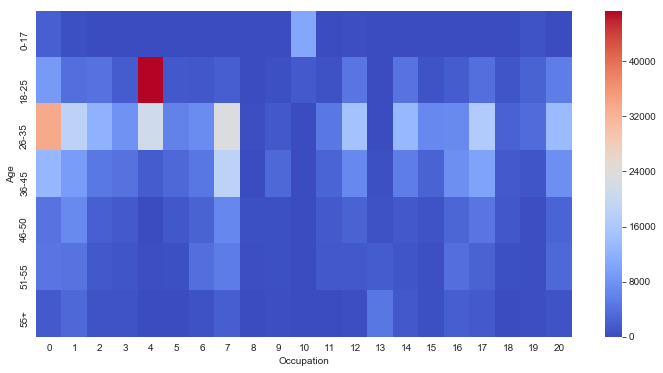

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(ageOcup,cmap='coolwarm')

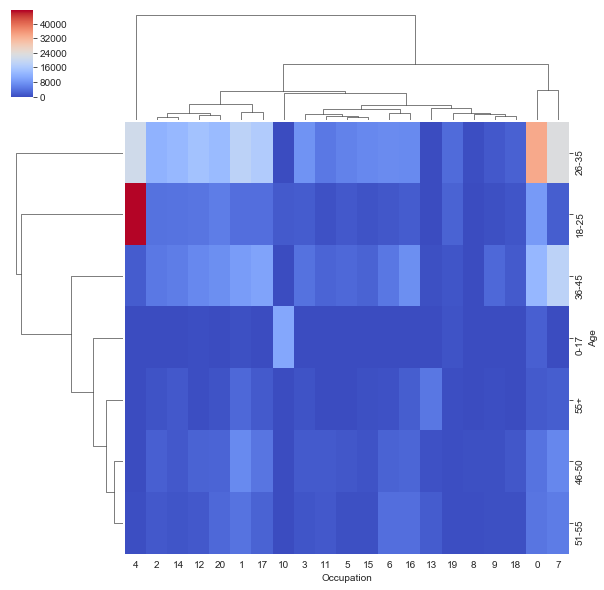

In [16]:
sns.clustermap(ageOcup,cmap='coolwarm')

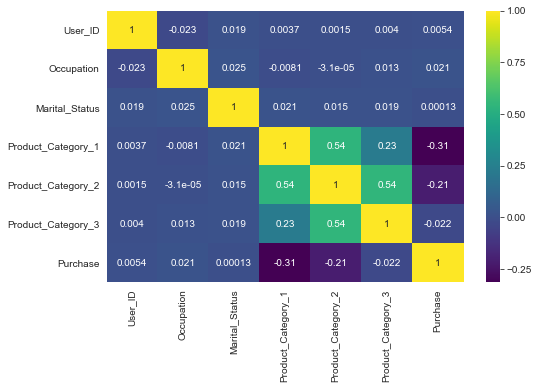

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(blackF.corr(),annot=True,cmap='viridis')

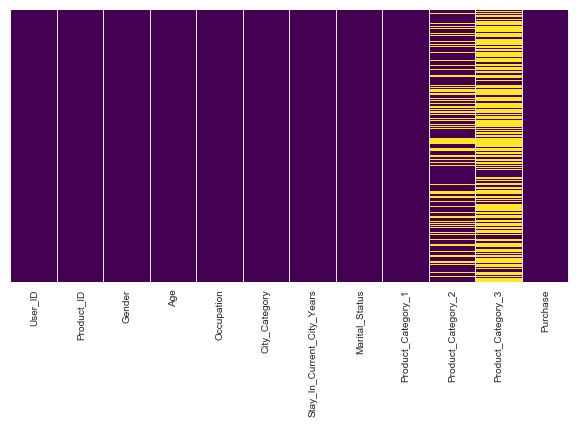

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(blackF.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

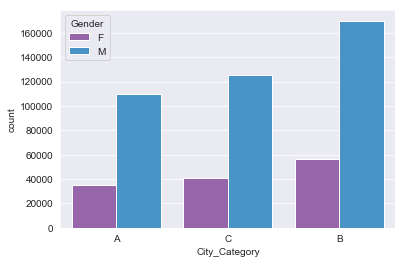

In [20]:
sns.countplot(x='City_Category' ,data=blackF,palette=flatui,hue='Gender')

In [21]:
blackF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [22]:
sex = pd.get_dummies(blackF['Gender'],drop_first=True)
age = pd.get_dummies(blackF['Age'],drop_first=True)
city = pd.get_dummies(blackF['City_Category'],drop_first=True)
BF =pd.concat([blackF,sex,age,city],axis=1)

In [23]:
BF.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Purchase,M,18-25,26-35,36-45,46-50,51-55,55+,B,C
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,8370,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,15200,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,...,1422,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,1057,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,...,7969,1,0,0,0,0,0,1,0,1


In [24]:
BF.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'M', '18-25',
       '26-35', '36-45', '46-50', '51-55', '55+', 'B', 'C'],
      dtype='object')

In [25]:
BF.drop(['User_ID', 'Product_ID', 'City_Category','Stay_In_Current_City_Years','Gender', 'Age','Product_Category_2', 'Product_Category_3'],inplace=True,axis=1)

In [26]:
BF.head()

,Occupation,Marital_Status,Product_Category_1,Purchase,M,18-25,26-35,36-45,46-50,51-55,55+,B,C
0,10,0,3,8370,0,0,0,0,0,0,0,0,0
1,10,0,1,15200,0,0,0,0,0,0,0,0,0
2,10,0,12,1422,0,0,0,0,0,0,0,0,0
3,10,0,12,1057,0,0,0,0,0,0,0,0,0
4,16,0,8,7969,1,0,0,0,0,0,1,0,1


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(BF.drop('Marital_Status',axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scaler_features = scaler.transform(BF.drop('Marital_Status',axis =1))

In [31]:
df_feat = pd.DataFrame(scaler_features,columns=['Occupation','Product_Category_1','Purchase','M','18-25','26-35','36-45','46-50','51-55','55+','B','C'])

In [32]:
df_feat.head()

,Occupation,Product_Category_1,Purchase,M,18-25,26-35,36-45,46-50,51-55,55+,B,C
0,0.293877,-0.612032,-0.193507,-1.751138,-0.471088,-0.815419,-0.499952,-0.300511,-0.274303,-0.201139,-0.853274,-0.669689
1,0.293877,-1.145266,1.177699,-1.751138,-0.471088,-0.815419,-0.499952,-0.300511,-0.274303,-0.201139,-0.853274,-0.669689
2,0.293877,1.787522,-1.588402,-1.751138,-0.471088,-0.815419,-0.499952,-0.300511,-0.274303,-0.201139,-0.853274,-0.669689
3,0.293877,1.787522,-1.661681,-1.751138,-0.471088,-0.815419,-0.499952,-0.300511,-0.274303,-0.201139,-0.853274,-0.669689
4,1.213543,0.721053,-0.274012,0.571057,-0.471088,-0.815419,-0.499952,-0.300511,-0.274303,4.971689,-0.853274,1.493231


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_feat
y = BF['Marital_Status']

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
predictions = dtree.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(confusion_matrix(y_test,predictions))

[[76669 28057]
 [31973 40702]]


In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72    104726
           1       0.59      0.56      0.58     72675

   micro avg       0.66      0.66      0.66    177401
   macro avg       0.65      0.65      0.65    177401
weighted avg       0.66      0.66      0.66    177401



In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
rfc_pred = rfc.predict(X_test)

In [45]:
print(confusion_matrix(y_test,rfc_pred))

[[75431 29295]
 [30778 41897]]


In [46]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72    104726
           1       0.59      0.58      0.58     72675

   micro avg       0.66      0.66      0.66    177401
   macro avg       0.65      0.65      0.65    177401
weighted avg       0.66      0.66      0.66    177401



In [47]:
from sklearn.model_selection import train_test_split
X = df_feat
y = BF['Marital_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.33,random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()

In [50]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76    104726
           1       0.71      0.33      0.45     72675

   micro avg       0.67      0.67      0.67    177401
   macro avg       0.68      0.62      0.61    177401
weighted avg       0.68      0.67      0.64    177401



In [53]:
confusion_matrix(y_test,predictions)

array([[94823,  9903],
       [48691, 23984]], dtype=int64)

In [54]:
from sklearn.model_selection import train_test_split
X = df_feat
y = BF['Marital_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.33,random_state=0)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [57]:
prediction = knn.predict(X_test)

In [58]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[74464 30262]
 [30872 41803]]


              precision    recall  f1-score   support

           0       0.71      0.71      0.71    104726
           1       0.58      0.58      0.58     72675

   micro avg       0.66      0.66      0.66    177401
   macro avg       0.64      0.64      0.64    177401
weighted avg       0.65      0.66      0.66    177401



In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))